### Machine Learning Project: Loan Prediction Model

#### This Notebook consists of 4 different Machine Learning Models with their accuracy.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
# File location and type
file_location = "/FileStore/tables/LoanTrain.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

In [0]:
display(df.describe())

summary,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614,592,600,564,614,614
mean,null,null,null,0.5547445255474452,null,null,5403.459283387622,1621.245798027101,146.41216216216216,342.0,0.8421985815602837,null,null
stddev,null,null,null,0.7853289861674311,null,null,6109.041673387181,2926.2483692241894,85.58732523570545,65.12040985461255,0.3648783192364052,null,null
min,LP001002,Female,No,0,Graduate,No,1000,0,100,12,0,Rural,N
max,LP002990,Male,Yes,3+,Not Graduate,Yes,9963,997,99,84,1,Urban,Y


In [0]:
df.printSchema()

root
-- Loan_ID: string (nullable = true)
-- Gender: string (nullable = true)
-- Married: string (nullable = true)
-- Dependents: string (nullable = true)
-- Education: string (nullable = true)
-- Self_Employed: string (nullable = true)
-- ApplicantIncome: string (nullable = true)
-- CoapplicantIncome: string (nullable = true)
-- LoanAmount: string (nullable = true)
-- Loan_Amount_Term: string (nullable = true)
-- Credit_History: string (nullable = true)
-- Property_Area: string (nullable = true)
-- Loan_Status: string (nullable = true)

#### Exploratory Data Analysis of the Data

In [0]:
dt = df.toPandas()

In [0]:
dt

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,None,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N


In [0]:
dt.isnull().sum()

Out[19]: Loan_ID 0
Gender 13
Married 3
Dependents 15
Education 0
Self_Employed 32
ApplicantIncome 0
CoapplicantIncome 0
LoanAmount 22
Loan_Amount_Term 14
Credit_History 50
Property_Area 0
Loan_Status 0
dtype: int64

In [0]:
dt['ApplicantIncome']=pd.to_numeric(dt['ApplicantIncome'])
dt['CoapplicantIncome']=pd.to_numeric(dt['CoapplicantIncome'])
dt['LoanAmount']=pd.to_numeric(dt['LoanAmount'])
dt['Loan_Amount_Term']=pd.to_numeric(dt['Loan_Amount_Term'])
dt['Credit_History']=pd.to_numeric(dt['Credit_History'])


In [0]:
dt['Dependents'] = dt['Dependents'].astype(object)

In [0]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID 614 non-null object
Gender 601 non-null object
Married 611 non-null object
Dependents 599 non-null object
Education 614 non-null object
Self_Employed 582 non-null object
ApplicantIncome 614 non-null int64
CoapplicantIncome 614 non-null float64
LoanAmount 592 non-null float64
Loan_Amount_Term 600 non-null float64
Credit_History 564 non-null float64
Property_Area 614 non-null object
Loan_Status 614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB

In [0]:
dt['LoanAmount'] = dt['LoanAmount'].fillna(dt['LoanAmount'].mean())
dt['Credit_History'] = dt['Credit_History'].fillna(dt['Credit_History'].median())

In [0]:
dt.isnull().sum()

Out[86]: Loan_ID 0
Gender 13
Married 3
Dependents 15
Education 0
Self_Employed 32
ApplicantIncome 0
CoapplicantIncome 0
LoanAmount 0
Loan_Amount_Term 14
Credit_History 0
Property_Area 0
Loan_Status 0
dtype: int64

In [0]:
dt.dropna(inplace=True)

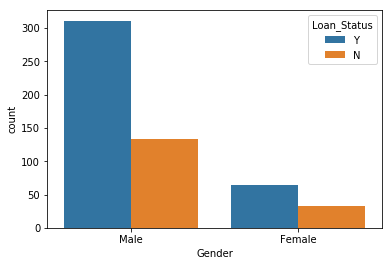

In [0]:
sns.countplot(dt['Gender'],hue=dt['Loan_Status'])

In [0]:
print(pd.crosstab(dt['Gender'],dt['Loan_Status']))

Loan_Status N Y
Gender 
Female 33 65
Male 133 311

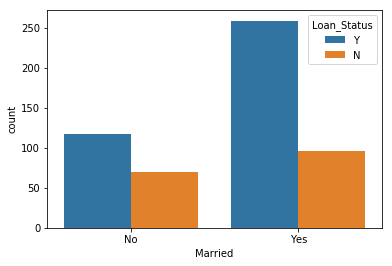

In [0]:
sns.countplot(dt['Married'],hue=dt['Loan_Status'])

In [0]:
print(pd.crosstab(dt['Married'],dt['Loan_Status']))

Loan_Status N Y
Married 
No 70 117
Yes 96 259

In [0]:
print(pd.crosstab(dt['Married'],dt['Loan_Status']))

Loan_Status N Y
Married 
No 70 117
Yes 96 259

In [0]:
print(pd.crosstab(dt['Education'],dt['Loan_Status']))

Loan_Status N Y
Education 
Graduate 122 303
Not Graduate 44 73

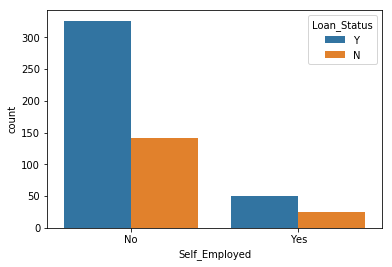

In [0]:
sns.countplot(dt['Self_Employed'],hue=dt['Loan_Status'])

In [0]:
print(pd.crosstab(dt['Self_Employed'],dt['Loan_Status']))

Loan_Status N Y
Self_Employed 
No 141 326
Yes 25 50

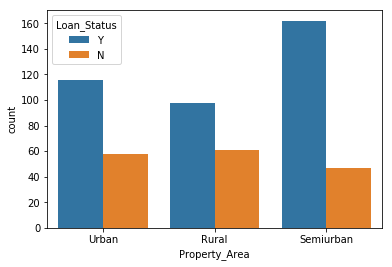

In [0]:
sns.countplot(dt['Property_Area'],hue=dt['Loan_Status'])

In [0]:
print(pd.crosstab(dt['Property_Area'],dt['Loan_Status']))

Loan_Status N Y
Property_Area 
Rural 61 98
Semiurban 47 162
Urban 58 116

In [0]:
dt['Loan_Status'].replace('Y',1,inplace=True)

In [0]:
dt['Loan_Status'].replace('N',0,inplace=True)

In [0]:
dt['Loan_Status'].value_counts()

Out[100]: 1 376
0 166
Name: Loan_Status, dtype: int64

In [0]:
dt.Gender=dt.Gender.map({'Male':1,'Female':0})

In [0]:
dt['Gender'].value_counts()

Out[102]: 1 444
0 98
Name: Gender, dtype: int64

In [0]:
dt.Married=dt.Married.map({'Yes':1,'No':0})

In [0]:
dt['Married'].value_counts()

Out[104]: 1 355
0 187
Name: Married, dtype: int64

In [0]:
dt.Dependents=dt.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [0]:
dt['Dependents'].value_counts()

Out[106]: 0 309
2 94
1 94
3 45
Name: Dependents, dtype: int64

In [0]:
dt.Education=dt.Education.map({'Graduate':1,'Not Graduate':0})

In [0]:
dt['Education'].value_counts()

Out[109]: 1 425
0 117
Name: Education, dtype: int64

In [0]:
group_state

Out[40]: array(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18',
 '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28',
 '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38',
 '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48',
 '49', '5', '6', '7', '8', '9'], dtype=object)

In [0]:
dt.Self_Employed=dt.Self_Employed.map({'Yes':1,'No':0})

In [0]:
dt['Self_Employed'].value_counts()


Out[111]: 0 467
1 75
Name: Self_Employed, dtype: int64

In [0]:
dt.Property_Area=dt.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [0]:
dt['Property_Area'].value_counts()

Out[113]: 1 209
2 174
0 159
Name: Property_Area, dtype: int64

In [0]:
dt['LoanAmount'].value_counts()

Out[114]: 146.412162 19
120.000000 15
100.000000 14
110.000000 13
187.000000 12
128.000000 10
130.000000 10
113.000000 10
160.000000 8
115.000000 7
70.000000 7
96.000000 7
112.000000 7
150.000000 7
104.000000 7
136.000000 6
144.000000 6
135.000000 6
90.000000 6
81.000000 6
95.000000 6
125.000000 6
116.000000 5
175.000000 5
180.000000 5
200.000000 5
80.000000 5
133.000000 5
158.000000 5
138.000000 5
 ..
570.000000 1
54.000000 1
78.000000 1
436.000000 1
304.000000 1
280.000000 1
240.000000 1
214.000000 1
59.000000 1
166.000000 1
308.000000 1
380.000000 1
208.000000 1
296.000000 1
119.000000 1
500.000000 1
246.000000 1
234.000000 1
86.000000 1
230.000000 1
190.000000 1
178.000000 1
218.000000 1
62.000000 1
360.000000 1
53.000000 1
65.000000 1
109.000000 1
156.000000 1
89.000000 1
Name: LoanAmount, Length: 195, dtype: int64

In [0]:
dt['Loan_Amount_Term'].value_counts()


Out[115]: 360.0 464
180.0 38
480.0 13
300.0 12
84.0 4
240.0 3
120.0 3
36.0 2
60.0 2
12.0 1
Name: Loan_Amount_Term, dtype: int64

In [0]:
dt['Credit_History'].value_counts()

Out[116]: 1.0 468
0.0 74
Name: Credit_History, dtype: int64

#### Printing Correlation  Matrix of the Dataset

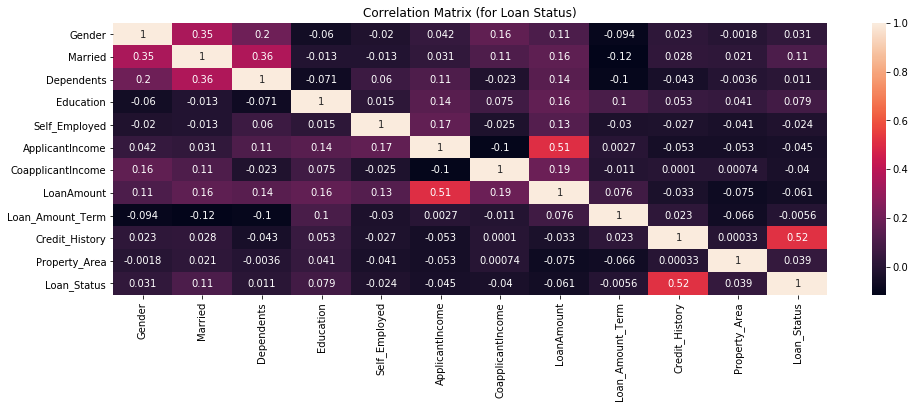

In [0]:
plt.figure(figsize=(16,5))
sns.heatmap(dt.corr(),annot=True)
plt.title('Correlation Matrix (for Loan Status)')

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#### Splitting the Training Set and Test Set of the Data

In [0]:
X = dt.iloc[1:542,1:12].values
y = dt.iloc[1:542,12].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

#### Logistic Regression: 78% Accuracy

In [0]:
model = LogisticRegression()
model.fit(X_train,y_train)

lr_prediction = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))

/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
 FutureWarning)
Logistic Regression accuracy = 0.7852760736196319

#### Support Vector Machines: 65% Accuracy

In [0]:
model = svm.SVC()
model.fit(X_train,y_train)

svc_prediction = model.predict(X_test)
print('SVM accuracy = ', metrics.accuracy_score(svc_prediction,y_test))

/databricks/python/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
 "avoid this warning.", FutureWarning)
SVM accuracy = 0.656441717791411

#### Decision Tree Classifier : 71% Accuracy

In [0]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

dt_prediction = model.predict(X_test)
print('Decision Tree accuracy = ', metrics.accuracy_score(dt_prediction,y_test))

Decision Tree accuracy = 0.7116564417177914

#### K-Nearest Neighbours: 61% Accuracy

In [0]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

knn_prediction = model.predict(X_test)
print('KNN accuracy = ', metrics.accuracy_score(knn_prediction,y_test))

KNN accuracy = 0.6196319018404908